In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('als_data.csv')

# Display basic information about the dataset
data.head()

D:\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [3]:
# Remove unnecessary variables 

# Assuming all columns except 'ID' and 'SubjectID' are relevant to ALS
als_data_cleaned = data.drop(['ID', 'SubjectID'], axis=1)

als_data_cleaned.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


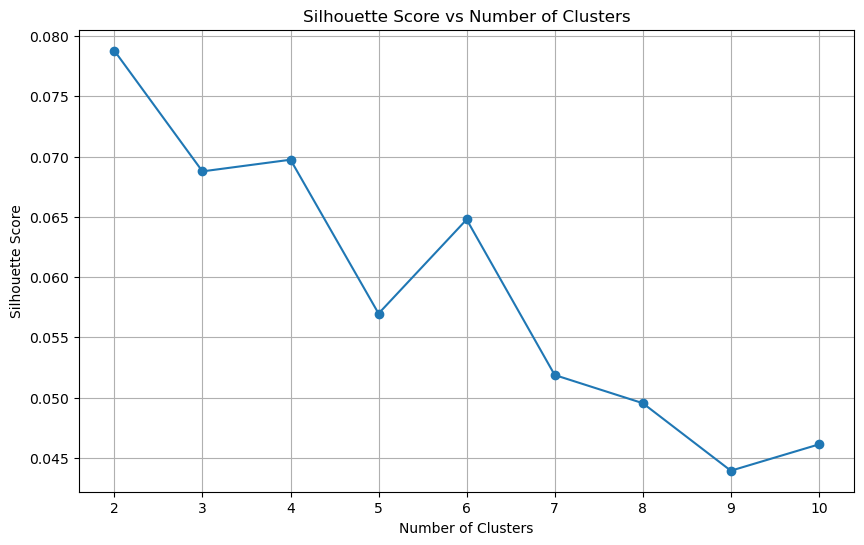

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Apply standard scaling
scaler = StandardScaler()
als_data_scaled = scaler.fit_transform(als_data_cleaned)

# Determine the optimal number of clusters using silhouette scores
range_n_clusters = list(range(2, 11))  # typically, 2-10 clusters are tried
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(als_data_scaled)
    silhouette_avg = silhouette_score(als_data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [6]:
# The optimal number of clusters might be 2, since it has the highest silhouette score.

# Fit the K-means model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(als_data_scaled)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

# Add the cluster assignments to your dataframe
als_data_cleaned['cluster'] = clusters

als_data_cleaned.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,cluster
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0,1
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0,1
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0,0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0,1
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0,0


In [8]:
from sklearn.decomposition import PCA


# Initialize PCA and fit it to the scaled data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(als_data_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

principal_df.head()

# Optionally, if you want to add the PCA components to your original data:
## data['principal_component_1'] = principal_components[:, 0]
## data['principal_component_2'] = principal_components[:, 1]

# Now `principal_df` contains the 2-dimensional representation of your data,
# and `data` contains the original data along with the PCA components.


,principal_component_1,principal_component_2
0,-1.426736,-2.320093
1,-1.440229,-4.871120
2,1.617855,-0.428832
3,-1.920011,2.094396
4,0.297694,0.166426


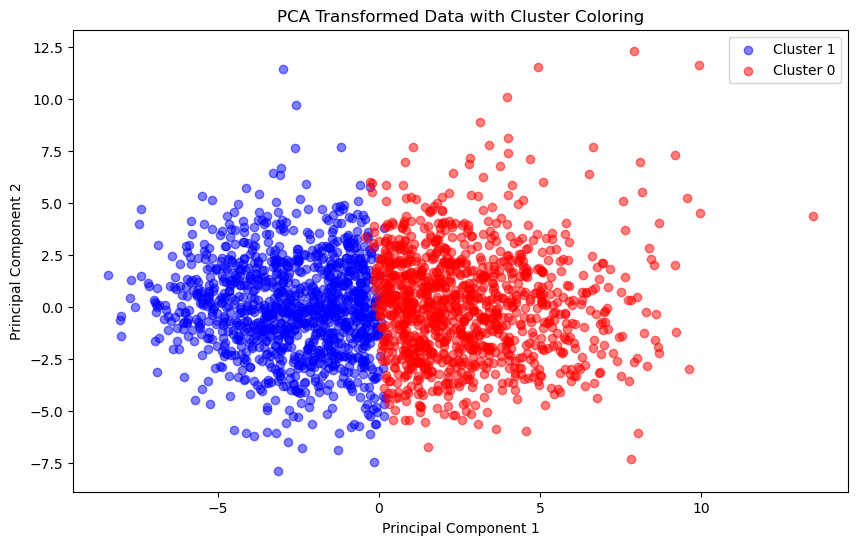

In [9]:

# Merge the cluster assignments with the PCA components
merged_df = principal_df.copy()
merged_df['cluster'] = als_data_cleaned['cluster']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Scatter plot assigning different colors for each cluster
for cluster in merged_df['cluster'].unique():
    cluster_data = merged_df[merged_df['cluster'] == cluster]
    plt.scatter(cluster_data['principal_component_1'], cluster_data['principal_component_2'], 
                c=colors[cluster], label=f'Cluster {cluster}', alpha=0.5)

# Title and labels
plt.title('PCA Transformed Data with Cluster Coloring')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Legend
plt.legend()

# Show plot
plt.show()


### Summary 

 In the analysis of the ALS patient data, the first step was to import and standardize the data. This process ensures that all features contribute equally to the analysis and helps improve the performance of algorithms that are sensitive to feature scales.Using the silhouette score, I determined that the optimal number of clusters for K-means clustering was 2. This was based on the peak silhouette score, which suggests the best compromise between the cohesion within the clusters and the separation between different clusters. Then I applied K-means clustering to the standardized data. To visualize and further analyze thedata, I performed PCA and reduced the feature space to two principal components. This dimensionality reduction allowed for easy visualization. The scatter plot of the PCA-transformed data shows two distinct clusters, which correspond to the K-means cluster assignments. The plot indicates that the two clusters are mostly separable, with each cluster forming a distinct group. There is some overlap, which is common in real-world data. The separation of clusters in the scatter plot implies that the K-means algorithm was able to identify meaningful patterns in the data that could potentially be used for further analysis, such as identifying characteristics that define each cluster. Finally, while the clustering appears to have been successful, the model's findings should be validated against external data or subject expertise to ensure that the clusters have practical significance and are not just statistical artifacts.